In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os

In [47]:
DATADIR = 'data'
DIR = '../data/2020'

dataset = os.path.join(DIR,'2020_imp.csv')

In [48]:
df_mont = pd.read_csv(f'{DATADIR}/smp-montvu-pp.csv', index_col=[0])
df_sold = pd.read_csv(f'{DATADIR}/smp-sold-pp.csv', index_col=[0])
df_pint = pd.read_csv(f'{DATADIR}/smp-pint-pp.csv', index_col=[0])
ds = pd.read_csv(dataset)

dfs = [df_mont, df_sold, df_pint]

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (6,7,8,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [49]:
def compute_duration(df, log=False):
    df['start'] = pd.to_datetime(df['start'])
    df['end'] = pd.to_datetime(df['end'])
    df['duration'] = df.end - df.start
    if log == True:
        df['dursec'] = np.log(df['duration'].dt.total_seconds())
    else:
        df['dursec'] = df['duration'].dt.total_seconds()
    return df

In [50]:
def normalize(df, col: str):
    return df[np.abs(stats.zscore(df[col].dt.total_seconds()))<3]

In [51]:
def violin_plot(df, col:str, color:str):
    return sns.violinplot(x=df[col], orient='v', inner = "quartile", color=color)
    #x = df[col].dt.total_seconds()
    #ax = sns.violinplot(x=x)

/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Outliers removed: 0


/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Outliers removed: 35
Outliers removed: 13


/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/home/gerac/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


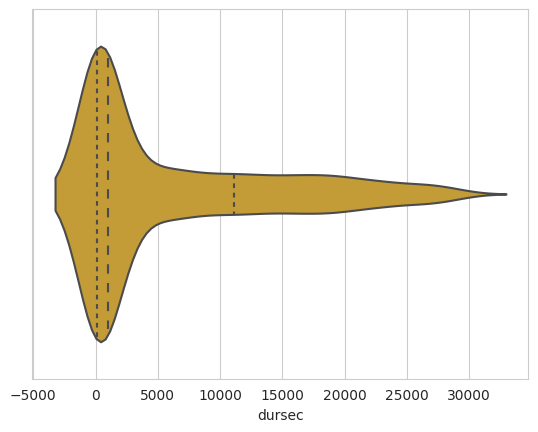

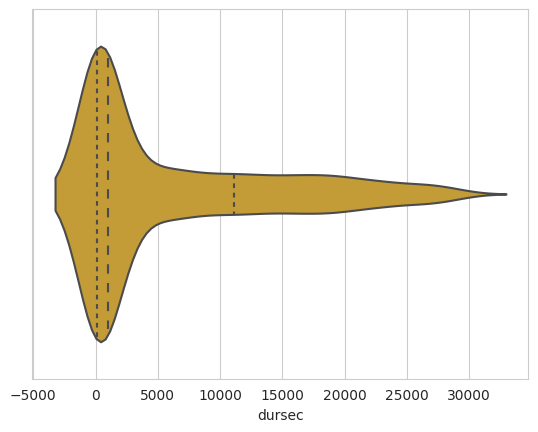

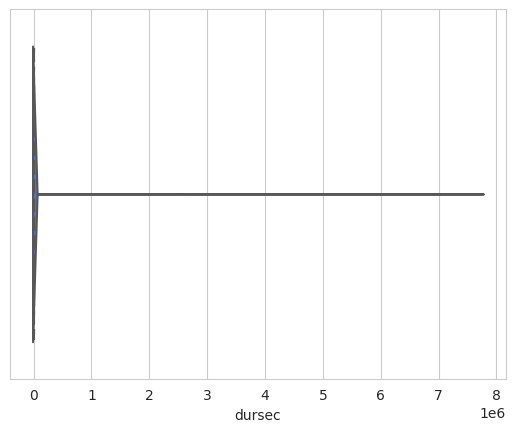

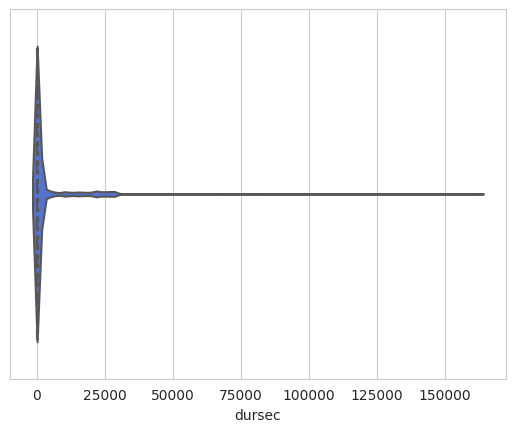

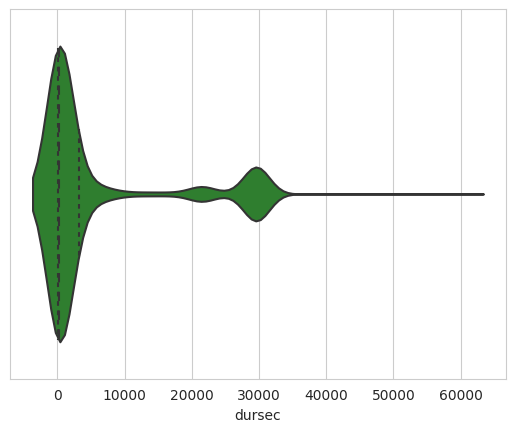

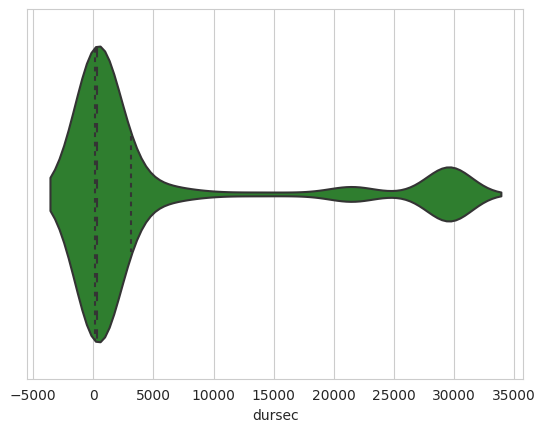

In [52]:
import matplotlib.pyplot as plt

colors = ['goldenrod', 'royalblue', 'forestgreen']
sns.set_style("whitegrid")

for i, df in enumerate(dfs):
    # Old length
    old_len = len(df)
    
    # Calculate values for new df
    df = compute_duration(df, log=False)
    
    #New figure
    plt.figure()
    
    # Old plot
    violin_plot(df, 'dursec', colors[i])
    
    # Remove outliers
    df = normalize(df, 'duration')
    
    # New length and final length
    new_len = len(df)
    final_len = old_len - new_len
    
    # New plot
    plt.figure()
    violin_plot(df, 'dursec', colors[i])
    
    print(f'Outliers removed: {final_len}')

In [53]:
df = pd.concat(dfs, sort=False)

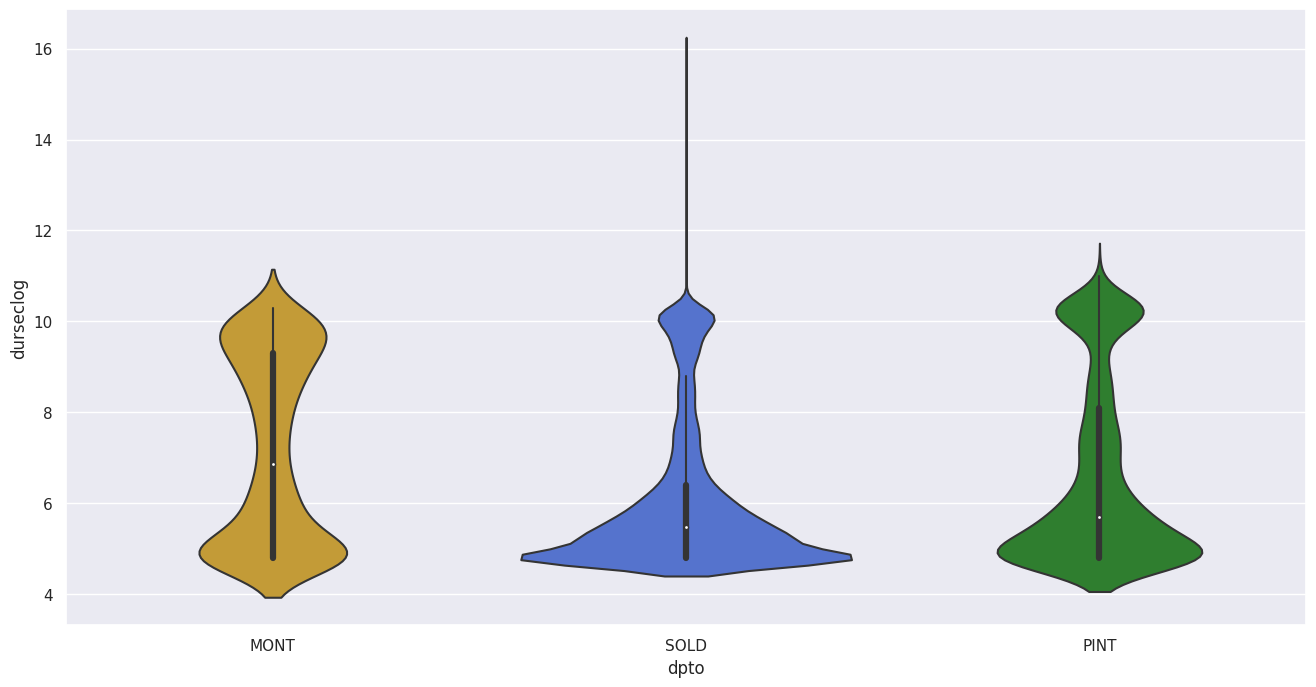

In [54]:
import seaborn as sns

sns.set(rc={'figure.figsize':(16,8)})
#ax = sns.violinplot(x=df['durseconds'])
df['durseclog'] = np.log(df['dursec'])
ax = sns.violinplot(x="dpto", y="durseclog", data=df, palette=colors)

In [55]:
df.index = pd.to_datetime(df.start)
#df.set_index('start', inplace=True)

In [56]:
df

,dpto,zone,start,end,duration,dursec,durseclog
start,,,,,,,
2021-01-18 12:34:00,MONT,140,2021-01-18 12:34:00,2021-01-18 12:36:00,0 days 00:02:00,120.0,4.787492
2021-01-18 09:55:00,MONT,128,2021-01-18 09:55:00,2021-01-18 09:57:00,0 days 00:02:00,120.0,4.787492
2021-01-18 08:47:00,MONT,102,2021-01-18 08:47:00,2021-01-18 08:54:00,0 days 00:07:00,420.0,6.040255
2021-01-18 08:36:00,MONT,102,2021-01-18 08:36:00,2021-01-18 08:38:00,0 days 00:02:00,120.0,4.787492
2021-01-15 11:01:00,MONT,122,2021-01-15 11:01:00,2021-01-15 11:03:00,0 days 00:02:00,120.0,4.787492
...,...,...,...,...,...,...,...
2020-01-01 06:00:00,PINT,3303 - CAB_BARNIZ,2020-01-01 06:00:00,2020-01-01 12:00:00,0 days 06:00:00,21600.0,9.980449
2020-01-01 06:00:00,PINT,3301 - CA_APRESTO,2020-01-01 06:00:00,2020-01-01 12:00:00,0 days 06:00:00,21600.0,9.980449
2020-01-01 06:00:00,PINT,3302 - CAB_BASE,2020-01-01 06:00:00,2020-01-01 12:00:00,0 days 06:00:00,21600.0,9.980449


In [57]:
df = df.loc['2020-05-01':'2021-01-01']

<ipython-input-57-1c8f501b2bbd>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df = df.loc['2020-05-01':'2021-01-01']


In [58]:
dptos = ['MONT', 'SOLD', 'PINT']

In [59]:
df

,dpto,zone,start,end,duration,dursec,durseclog
start,,,,,,,
2020-12-30 13:28:00,MONT,111,2020-12-30 13:28:00,2020-12-30 13:30:00,0 days 00:02:00,120.0,4.787492
2020-12-30 13:19:00,MONT,141,2020-12-30 13:19:00,2020-12-30 13:21:00,0 days 00:02:00,120.0,4.787492
2020-12-30 13:17:00,MONT,140,2020-12-30 13:17:00,2020-12-30 13:19:00,0 days 00:02:00,120.0,4.787492
2020-12-30 13:16:00,MONT,138,2020-12-30 13:16:00,2020-12-30 13:25:00,0 days 00:09:00,540.0,6.291569
2020-12-30 09:45:00,MONT,122,2020-12-30 09:45:00,2020-12-30 09:47:00,0 days 00:02:00,120.0,4.787492
...,...,...,...,...,...,...,...
2020-06-01 07:48:00,PINT,3201 - B.MANUT_Z1,2020-06-01 07:48:00,2020-06-01 08:02:00,0 days 00:14:00,840.0,6.733402
2020-06-01 07:09:00,PINT,3301 - CA_APRESTO,2020-06-01 07:09:00,2020-06-01 07:11:00,0 days 00:02:00,120.0,4.787492
2020-06-01 06:23:00,PINT,3203 - B.MANUT_Z3,2020-06-01 06:23:00,2020-06-01 06:31:00,0 days 00:08:00,480.0,6.173786


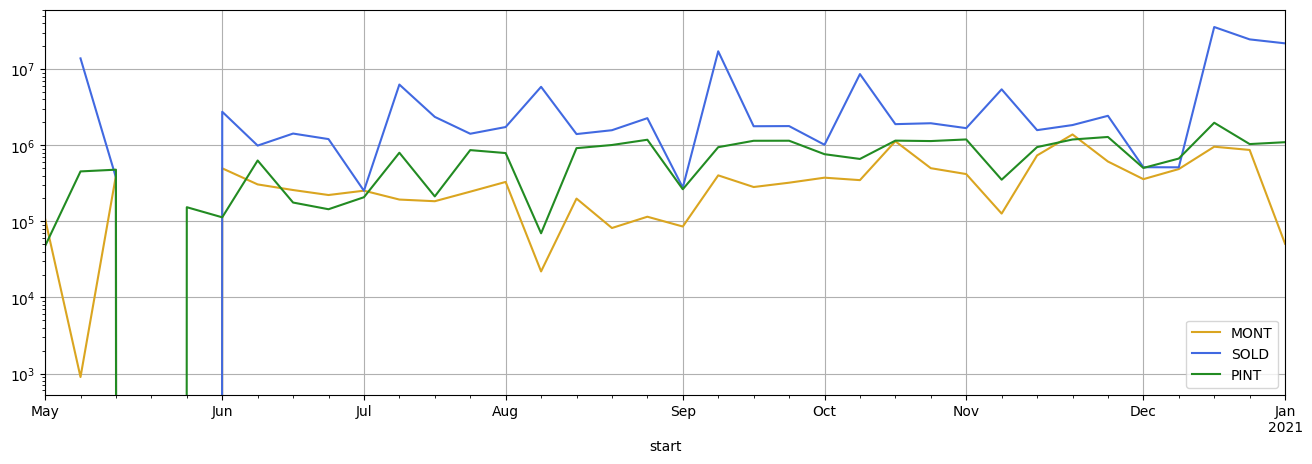

In [61]:

plt.style.use('default')

for i, dpto in enumerate(dptos):
    df[df.dpto==f'{dpto}'].resample('W').sum()['dursec'].plot(logy=True, figsize=(16,5), label=f'{dpto}', legend=True, color=colors[i], grid=True)
    #df[df.dpto=='PINT'].resample('W').sum()['duration'].plot()
    #df[df.dpto=='MONT'].resample('W').sum()['duration'].plot()

In [63]:
ds.DECL = pd.to_datetime(ds.DECL)
ds.set_index(ds.DECL, inplace=True)
ds

,Unnamed: 0,AUDI,DECL,DPTO,ELE,GVD,INC,INOFFDPTO,INOFFUSI,LOC,MADU,PJI,RETO,TALL,TIPO,UET,ZONA
DECL,,,,,,,,,,,,,,,,,
2020-01-27 09:00:00,0,CAPS,2020-01-27 09:00:00,SOLD,4120,V2,180,NaN,NaN,-,NaN,655200530232,NaN,TOLE4,MOP,431,NaN
2020-01-27 09:00:00,1,CAPS,2020-01-27 09:00:00,PINT,4466,V2,1010,NaN,NaN,-,NaN,655200420197,NaN,PTAL2,MOP,484,NaN
2020-01-27 09:00:00,2,CAPS,2020-01-27 09:00:00,PINT,4420,V2,1110,NaN,NaN,-,NaN,655200450172,NaN,PTAL2,ASP,483,NaN
2020-01-27 09:00:00,3,CAPS,2020-01-27 09:00:00,PINT,4412,V2,1180,NaN,NaN,-,NaN,655200450172,NaN,PTAL2,ASP,484,NaN
2020-01-27 09:00:00,4,CAPS,2020-01-27 09:00:00,PINT,4414,V2,1270,NaN,NaN,-,NaN,655200420197,NaN,PTAL2,ASP,486,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 09:06:00,235533,PESD,2020-12-30 09:06:00,PINT,4502,V2,1000,NaN,NaN,GRAL,NaN,655210140012,NaN,SERVP,ASP,DIP,PESD
2020-12-30 10:03:00,235534,PESD,2020-12-30 10:03:00,SOLD,7887,V2,3220,NaN,NaN,-,NaN,655210140033,NaN,TOLE4,GMTR,659,PESD
2020-12-30 10:03:00,235535,PESD,2020-12-30 10:03:00,MONTVU,5215,V2,4450,NaN,NaN,K74,NaN,655210140033,NaN,CH-ME,NCON,654,PESD


In [86]:
df['durhours'] = df['dursec']/3600

<AxesSubplot:xlabel='start'>

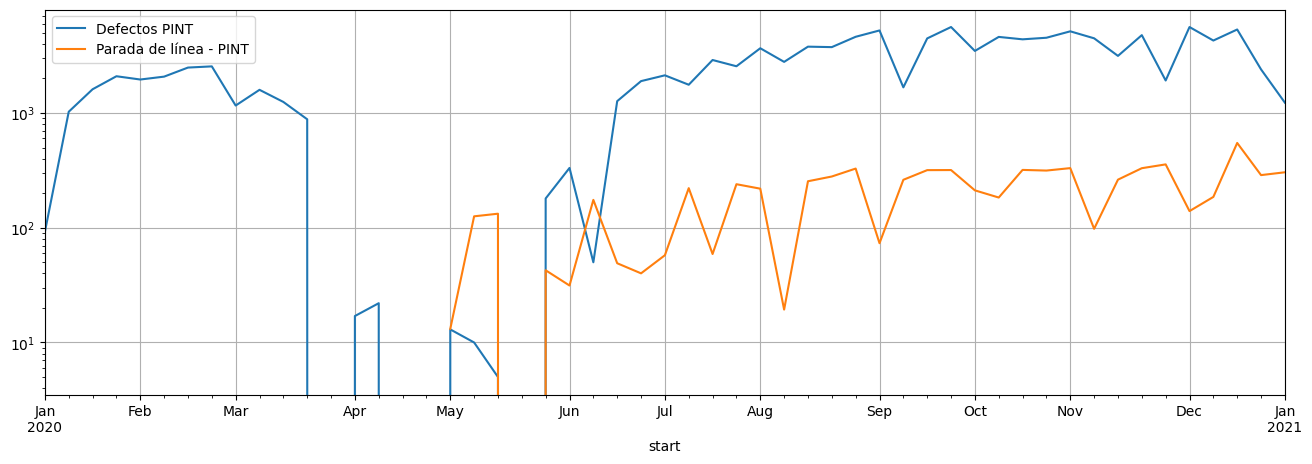

In [87]:
dpto = 'PINT'
ds[ds.DPTO==dpto]['AUDI'].resample('W').count().plot(grid=True, label=f'Defectos {dpto}', legend=True)
df[df.dpto==dpto].resample('W').sum()['durhours'].plot(logy=True, figsize=(16,5), label=f'Parada de línea - {dpto}', legend=True, grid=True)

<AxesSubplot:xlabel='start'>

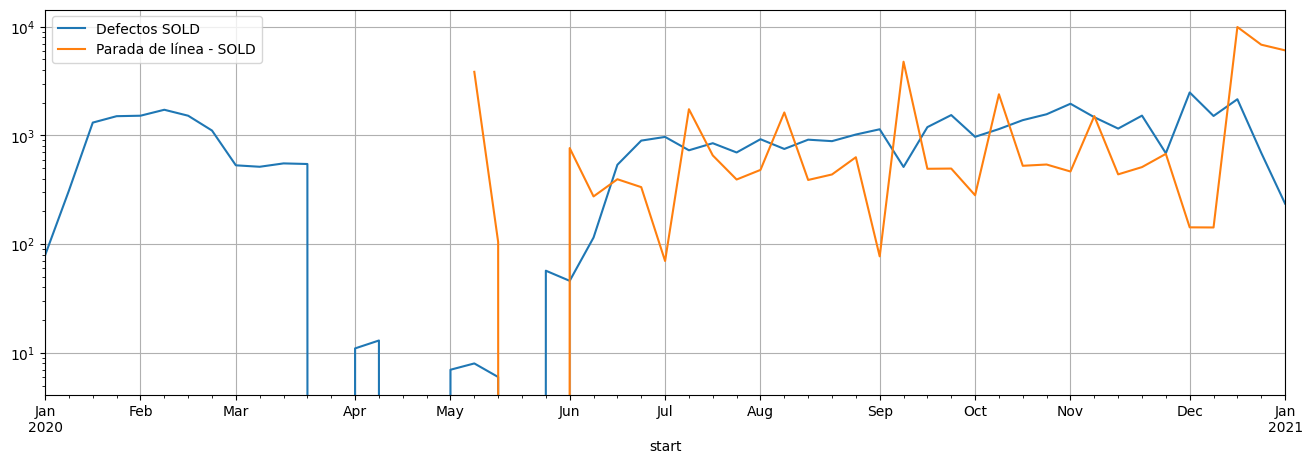

In [88]:
dpto = 'SOLD'
ds[ds.DPTO==dpto]['AUDI'].resample('W').count().plot(grid=True, label=f'Defectos {dpto}', legend=True)
df[df.dpto==dpto].resample('W').sum()['durhours'].plot(logy=True, figsize=(16,5), label=f'Parada de línea - {dpto}', legend=True, grid=True)

<AxesSubplot:xlabel='start'>

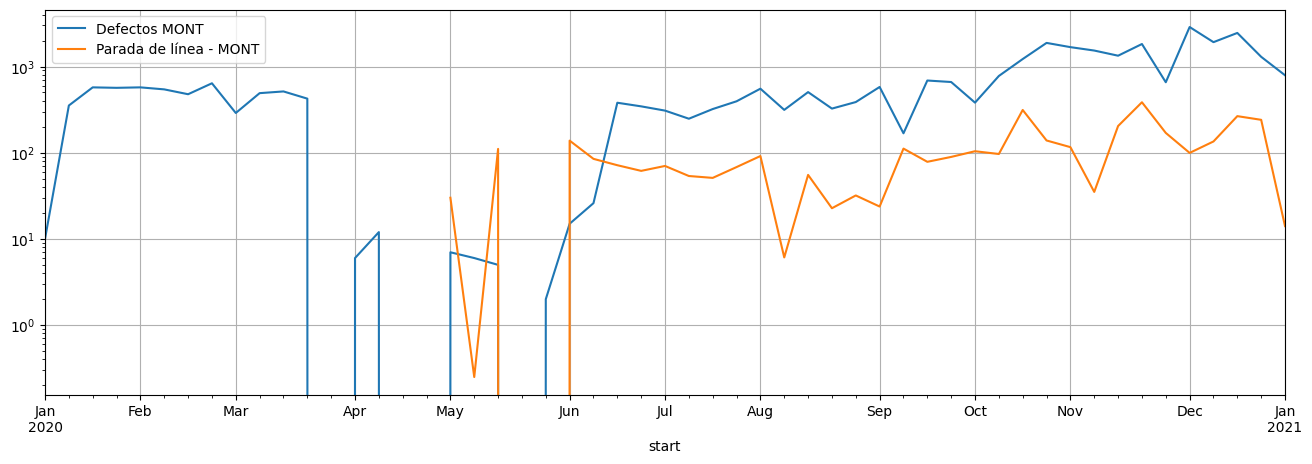

In [89]:
dpto = 'MONT'
ds[ds.DPTO==dpto]['AUDI'].resample('W').count().plot(grid=True, label=f'Defectos {dpto}', legend=True)
df[df.dpto==dpto].resample('W').sum()['durhours'].plot(logy=True, figsize=(16,5), label=f'Parada de línea - {dpto}', legend=True, grid=True)

<AxesSubplot:xlabel='DECL'>

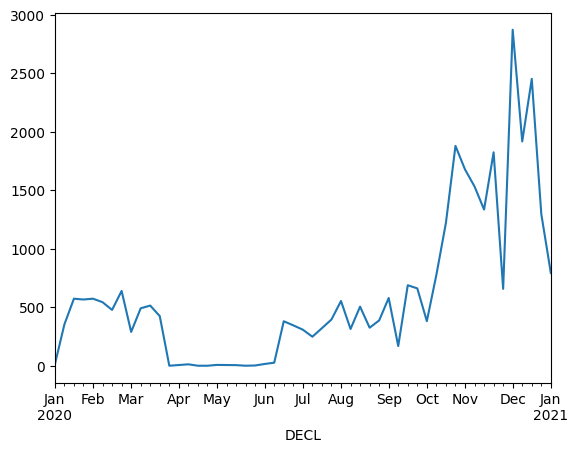

In [76]:
ds[ds.DPTO=='MONT'].resample('W').count()['AUDI'].plot()

In [75]:
ds.DPTO = ds.DPTO.replace({'MONTVU':'MONT'})

In [40]:
df.DPTO.value_counts()

PINT    122904
SOLD     43959
MONT     32321
SQF      15959
DIVD     12362
DLI       1418
EMB        580
CALI       255
Name: DPTO, dtype: int64

In [102]:
ds['week'] = ds.index.isocalendar().week

In [106]:
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
ds['weekday'] = ds.index.dayofweek.map(dayOfWeek)

In [157]:
new_df = ds.resample('15min').count()

In [158]:
new_df['week'] = new_df.index.week

<ipython-input-158-17cc2607b992>:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  new_df['week'] = new_df.index.week


In [159]:
new_df['dayofweek'] = new_df.index.dayofweek

In [163]:
piv = pd.pivot_table(new_df, index=['dayofweek'],columns=['week'], values=['AUDI'], aggfunc=np.sum)

In [164]:
piv

AUDI                                                         \
week          1      2       3       4       5       6       7       8    
dayofweek                                                                 
0            NaN  327.0   343.0   854.0  1123.0  1056.0  1046.0  1154.0   
1            NaN  986.0   877.0  1063.0  1038.0  1205.0  1170.0  1250.0   
2            NaN  309.0  1052.0   974.0  1151.0  1091.0  1486.0  1035.0   
3          124.0   70.0   995.0  1060.0  1063.0  1338.0  1214.0  1179.0   
4           71.0  304.0   891.0  1124.0   992.0  1258.0  1100.0   998.0   
5            0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0   
6            0.0   37.0     0.0     0.0     0.0    12.0     0.0     0.0   

                         ...                                                  \
week          9      10  ...      44      45      46      47      48      49   
dayofweek                ...                                                   
0            0.0  812.0  ...  1697.0  1802.0  1143.0  1391.0     0.0  1794.0   
1            0.0  772.0  ...  1683.0  1781.0   808.0  1730.0  1004.0  1807.0   
2          864.0  596.0  ...  1710.0  1467.0  1199.0  1716.0  1212.0  1836.0   
3          805.0  625.0  ...  1839.0  1414.0  1103.0  1310.0   224.0  1897.0   
4          886.0  534.0  ...  1886.0  1050.0  1412.0  1017.0   520.0  1867.0   
5            3.0    0.0  ...     0.0     0.0     0.0   980.0   323.0  1843.0   
6            0.0    0.0  ...     0.0    13.0     0.0     0.0     0.0     0.0   

                                           
week           50      51      52      53  
dayofweek                                  
0             0.0  2138.0  1764.0  1101.0  
1             5.0  2022.0  1634.0   622.0  
2          1979.0  2287.0  1009.0   542.0  
3          1938.0  2104.0     0.0     NaN  
4          2015.0  1488.0     0.0     NaN  
5          1821.0     0.0     0.0     NaN  
6             0.0     0.0     0.0     NaN  

[7 rows x 53 columns]

<AxesSubplot:xlabel='dayofweek'>

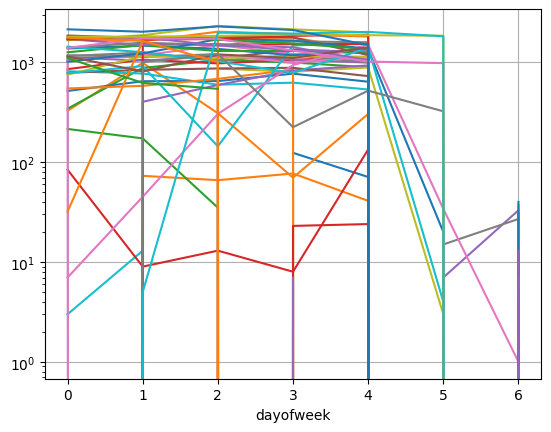

In [166]:
import seaborn as sns
piv.plot(legend=False, grid=True, logy=True)